#**Deep learning Practical Assignment #2**

Elaborated by: 

*   Nour Borgi
*   Salma Halloumi
*   Eya Abdelmoula






##Practical assignment objective

---



The goal of this assignment is to create a fully connected network and train different models on different dataset.

## All imports that we need
---

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 import pandas as pd
 #load_data
 from sklearn.datasets import load_iris
 from sklearn.datasets import load_digits
 from sklearn.datasets import fetch_olivetti_faces
 #import_sklearn
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.metrics import accuracy_score
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.preprocessing import LabelEncoder
 #import_keras
 from keras.metrics import Precision , Recall
 from keras.models import Sequential
 from keras.layers import Dense
 from keras.utils import np_utils

## 1. Implementing fully connected dataset 


---


In [ ]:
#implementing from scratch the perceptron algorithm.
def perceptron():
  w=np.array([0,0,0])
  x=''
  for t in range(0,n):
    Wold=w
    for i in range(0,len(X_train)):
      x=np.insert(X_train[i],0,1)
      if(y_train[i]*np.dot(w,x)<=0):
        w=Wold+y_train[i]*x
    if(np.array_equal(w,Wold)):
      return Wold
  return w


In [ ]:
def predict(X,w):
  y_pred=np.full(len(X),0)
  for i in range(0,len(X)):
    x=np.insert(X[i],0,1)
    if np.dot(w,x) <= 0.0:
      y_pred[i]= -1
    else:
      y_pred[i]= 1
  return y_pred

### **1.1 Toy data set**

In [ ]:
# shuffle the data-set and split it into train and test set, containing 80% and 20% of the dataset.
def split_data(u1,u2,sigma,num,model=False):

  X1 = sigma * np.random.randn(num,2)+u1 # Generating the first 125 xi that have label yi = −1.
  X2 = sigma * np.random.randn(num,2)+u2 # Generating the last 125 xi that have label yi = 1.
  X = np.concatenate((X1,X2),axis=0) # concatenating the data.
  y=np.full(num,-1)
  y=np.append(y,np.full(num,1))
  # it's a good practice to reshape the output attribute.
  if (model): 
    y = y.reshape(-1, 1)
    encoder = OneHotEncoder(sparse=False)
    y= encoder.fit_transform(y)
  return train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
u1=[-1,0]
u2=[1,0]
std=0.5
X_train,X_test,y_train,y_test = split_data(u1 ,u2,std, 125)
W=perceptron(100)
accuracy_score(y_pred=predict(X_test,W),y_true=y_test)

0.96

###**1.2 Using keras**


In [ ]:
#initialisation of data
u1=[-1,0]
u2=[1,0]
std=0.5
X_train,X_test,y_train,y_test = split_data(u1 ,u2,std, 125,True)

model = Sequential()
model.add(Dense (12, input_dim =2, activation = 'relu'))
model.add(Dense(5, activation =  'relu' ))
model.add(Dense (2, activation = 'relu'))

# Compile the keras model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =[ 'accuracy' ])
# Fit the keras model on the dataset
model.fit (X_train, y_train, epochs =150, batch_size =10, verbose=0)
# Evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 7ms/step - loss: 0.3067 - accuracy: 0.9800
Accuracy: 98.00


##2. Lab description

---

In [ ]:

#load_data_iris.
data = load_iris()

#it's a good practice to reshape the output attribute.
y = data.target.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y= encoder.fit_transform(y)

#shuffle and split the iris data. 
X_train,X_test,y_train,y_test = train_test_split(data.data,y,test_size=0.2, stratify=y, random_state=42)


**IRIS dataset overview**\
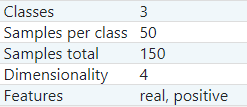

###**2.1 Selecting best model for iris**

###Experiment 1:

In [ ]:
# Sample code to create a fully connected network with one layer:
# 3 neurones in the 1st layer with relu as activation function.

model = Sequential()

model.add(Dense(3,input_shape=(4,),activation='relu'))
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs =300, batch_size =10, verbose=0)
# Evaluate the keras model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 6.8083 - accuracy: 0.3333


[6.808270454406738, 0.3333333432674408]

###Experiment 2

In [ ]:
# Sample code to create a fully connected network with 2 layers and Recall and precision as metrics:
# 1 neurone in the 1st layer with relu as activation function. 
# 3 neurones in the second layer with sigmoid as activation function.


model = Sequential()

model.add(Dense(1, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile the keras model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[Precision(), Recall()])
# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs =100, batch_size =10, verbose=0)
# Evaluate the keras model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 279ms/step - loss: 1.0986 - precision_12: 0.3333 - recall_12: 0.3333


[1.0986125469207764, 0.3333333432674408, 0.3333333432674408]

###Experiment 3

In [ ]:
# Sample code to create a fully connected network with 4 layers and mse as metrics:
# 2 neurones in the 1st layer with relu as activation function.
# 3 neurones in the third layer with sigmoid as activation function. 

model = Sequential()

model.add(Dense(2,input_shape=(4,),activation='relu'))
model.add(Dense(3,activation='sigmoid'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs =300, batch_size =10, verbose=0)
# Evaluate the keras model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 118ms/step - loss: 0.3601 - accuracy: 0.8667


[0.36005863547325134, 0.8666666746139526]

### Experiment 4

In [ ]:
# Sample code to create a fully connected network with 4 layers:
# 12 neurones in the 1st layer with relu as activation function.
# 7 neurones in the second layer with relu as activation function.
# 5 neurones in the third layer with relu as activation function. 
# 3 neurones in the fourth layer with softmax as activation function. 

model = Sequential()

model.add(Dense(12,input_shape=(4,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='softmax'))

# Compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs =300, batch_size =10, verbose=0)
# Evaluate the keras model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 122ms/step - loss: 0.0295 - accuracy: 1.0000


[0.029541926458477974, 1.0]

####**interpretation** 
The best architecture is the one that has 4 layers: \
* 12 neurons in the 1st layer with relu as activation function.
* 7 neurons in the second layer with relu as activation function.
* 5 neurons in the third layer with relu as activation function. 
* 3 neurons in the fourth layer with softmax as activation function. \


Results metrics : accuracy: 1.000 - loss: 0.0397

##3. Working towards the CNN
---

###**Best model for digits dataset**

**Digits dataset overview**\
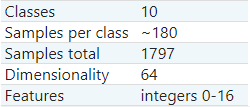

In [ ]:
#load digits data
digits=load_digits()
target = digits.target
#encode data
encoder = LabelEncoder()
encoder.fit(target)
encoded_Y = encoder.transform(target)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
#split data
X_train,X_test,y_train,y_test = train_test_split(digits.data,dummy_y,test_size=0.2,  random_state=42)

model = Sequential()

# add layers to model
model.add(Dense(200,input_shape=(64,),activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs =150, batch_size =10, verbose=0)
# Evaluate the keras model
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9833


[0.12433768063783646, 0.9833333492279053]

####**interpretation** 
The best architecture is the one that has 4 layers: \
* 200 neurons in the 1st layer with relu as activation function.
* 100 neurons in the second layer with relu as activation function.
* 64 neurons in the third layer with relu as activation function. 
* 10 neurons in the fourth layer with softmax as activation function. \
Error function: categorical crossentropy\
Optimizer: Adam

Results metrics : accuracy: 0.9833 - loss: 0.1243

=> We need a very large network to achieve high accuracy


###**Best model for olivetti faces dataset**

**olivetti faces dataset overview**\
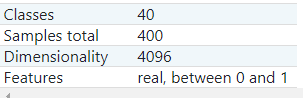

In [ ]:
#load data
olivetti=fetch_olivetti_faces(shuffle=True)
data = olivetti.data
target=olivetti.target
#encode data
encoder = LabelEncoder()
encoder.fit(target)
encoded_Y = encoder.transform(target)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
#split data
X_train,X_test,y_train,y_test = train_test_split(data,dummy_y,test_size=0.2, random_state=42)

model = Sequential()
# Add layers
model.add(Dense(300,input_shape=(4096,),activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(40,activation='softmax'))

# Compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs =150, batch_size =100,verbose=0)
# Evaluate the keras model
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.4835 - accuracy: 0.8750


[0.4834970533847809, 0.875]

####**interpretation** 
The best architecture is the one that has 4 layers: \
* 300 neurons in the 1st layer with relu as activation function.
* 100 neurons in the second layer with relu as activation function.
* 64 neurons in the third layer with relu as activation function. 
* 40 neurons in the fourth layer with softmax as activation function. \

Error function: categorical crossentropy\
Optimizer: Adam

Results metrics : accuracy: 0.8750 - loss: 0.4835 

=> We need an even larger network to achieve high accuracy
